# Clasificaciones usando muestra de tamaño 2500

In [1]:
import pickle

import numpy as np

import pandas as pd

% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set()

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler

from libs.container import Container
from libs.display import d
from libs.experiment import KFoldExperiment, WithAnotherExperiment, roc

In [2]:
import joblib
cpu = joblib.cpu_count()

In [3]:
sample = pd.read_pickle("data/ogle3_only/scaled/s2_5k.pkl.bz2")
sample["tile"] = sample["id"].apply(lambda i: "b" + str(i)[1:4])
sample["cls"] = sample.vs_type.apply(lambda x: 0 if x == "" else 1)

In [4]:
no_features = ["id", "vs_catalog", "vs_type", "ra_k", "dec_k", "tile", "cls"] 
X_columns = [c for c in sample.columns if c not in no_features]

grouped = sample.groupby("tile")
data = Container({k: grouped.get_group(k).copy() for k in grouped.groups.keys()})

del grouped, sample

## Features

In [5]:
cls = {0:0, 1:1}

In [6]:
d(X_columns)

1. cnt
2. Amplitude
3. Autocor_length
4. Beyond1Std
5. CAR_mean
6. CAR_sigma
7. CAR_tau
8. Con
9. Eta_e
10. FluxPercentileRatioMid20
11. FluxPercentileRatioMid35
12. FluxPercentileRatioMid50
13. FluxPercentileRatioMid65
14. FluxPercentileRatioMid80
15. Freq1_harmonics_amplitude_0
16. Freq1_harmonics_amplitude_1
17. Freq1_harmonics_amplitude_2
18. Freq1_harmonics_amplitude_3
19. Freq1_harmonics_rel_phase_0
20. Freq1_harmonics_rel_phase_1
21. Freq1_harmonics_rel_phase_2
22. Freq1_harmonics_rel_phase_3
23. LinearTrend
24. MaxSlope
25. Mean
26. Meanvariance
27. MedianAbsDev
28. MedianBRP
29. PairSlopeTrend
30. PercentAmplitude
31. PercentDifferenceFluxPercentile
32. PeriodLS
33. Period_fit
34. Psi_CS
35. Psi_eta
36. Q31
37. Rcs
38. Skew
39. SmallKurtosis
40. Std
41. c89_jk_color
42. c89_hk_color
43. c89_jh_color
44. n09_jk_color
45. n09_hk_color
46. n09_jh_color
47. c89_m2
48. c89_m4
49. c89_c3
50. n09_m2
51. n09_m4
52. n09_c3
53. AmplitudeH
54. AmplitudeJ
55. ppmb
56. AmplitudeJH
57. AmplitudeJK

## b278 - K-Folds

In [7]:
%%time
svc_linear = KFoldExperiment(
    clf=SVC(kernel='linear', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
svc_linear = svc_linear("b278", nfolds=10)

             precision    recall  f1-score   support

        0.0       0.95      0.98      0.96      2489
        1.0       0.86      0.68      0.76       423

avg / total       0.93      0.94      0.93      2912

--------------------------------------------------------------------------------
CPU times: user 36 s, sys: 50 ms, total: 36 s
Wall time: 36 s


In [8]:
%%time
svc_poly = KFoldExperiment(
    clf=SVC(kernel='poly', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
svc_poly = svc_poly("b278", nfolds=10)

             precision    recall  f1-score   support

        0.0       0.93      0.99      0.96      2489
        1.0       0.88      0.53      0.66       423

avg / total       0.92      0.92      0.91      2912

--------------------------------------------------------------------------------
CPU times: user 19.5 s, sys: 2 ms, total: 19.5 s
Wall time: 19.5 s


In [9]:
%%time
svc_rbf = KFoldExperiment(
    clf=SVC(kernel='rbf', probability=True), clsnum=cls,
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
svc_rbf = svc_rbf("b278", nfolds=10)

             precision    recall  f1-score   support

        0.0       0.94      0.99      0.97      2489
        1.0       0.91      0.66      0.77       423

avg / total       0.94      0.94      0.94      2912

--------------------------------------------------------------------------------
CPU times: user 20.8 s, sys: 141 ms, total: 21 s
Wall time: 21 s


In [10]:
%%time
rf = KFoldExperiment(
    clf=RandomForestClassifier(n_estimators=500, criterion="entropy", n_jobs=cpu), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
rf = rf("b278", nfolds=10)

             precision    recall  f1-score   support

        0.0       0.97      0.99      0.98      2489
        1.0       0.94      0.85      0.89       423

avg / total       0.97      0.97      0.97      2912

--------------------------------------------------------------------------------
CPU times: user 2min 57s, sys: 9.82 s, total: 3min 7s
Wall time: 42.3 s


In [11]:
%%time
knn = KFoldExperiment(
    clf=KNeighborsClassifier(n_neighbors=50, weights='distance'), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
knn = knn("b278", nfolds=10)

             precision    recall  f1-score   support

        0.0       0.94      0.99      0.96      2489
        1.0       0.89      0.60      0.72       423

avg / total       0.93      0.93      0.93      2912

--------------------------------------------------------------------------------
CPU times: user 4.45 s, sys: 2 ms, total: 4.45 s
Wall time: 4.45 s


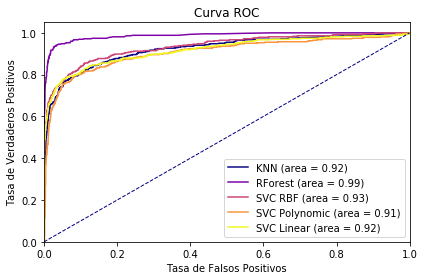

In [12]:
roc({"KNN": knn, "RForest": rf, 
     "SVC RBF": svc_rbf, 
     "SVC Linear": svc_linear,
     "SVC Polynomic": svc_poly})

## b278 vs. Los demas

b278 (TRAIN) Vs. b261 (TEST)
             precision    recall  f1-score   support

          0       0.98      0.98      0.98      2497
          1       0.82      0.80      0.81       221

avg / total       0.97      0.97      0.97      2718

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.97      0.99      0.98      2495
          1       0.87      0.73      0.79       296

avg / total       0.96      0.96      0.96      2791

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.97      0.99      0.98      2500
          1       0.89      0.72      0.80       305

avg / total       0.96      0.96      0.96      2805

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b264 (TE

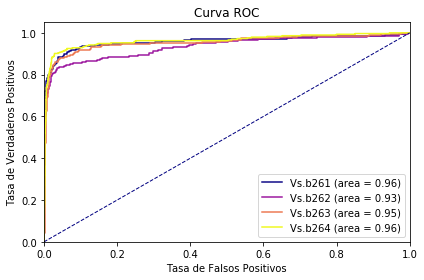

CPU times: user 19.6 s, sys: 0 ns, total: 19.6 s
Wall time: 19.6 s


In [13]:
%%time
svc_linear = WithAnotherExperiment(
    clf=SVC(kernel='linear', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_linear("b278"))

b278 (TRAIN) Vs. b261 (TEST)
             precision    recall  f1-score   support

          0       0.98      0.98      0.98      2497
          1       0.80      0.72      0.76       221

avg / total       0.96      0.96      0.96      2718

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.96      0.99      0.98      2495
          1       0.90      0.67      0.77       296

avg / total       0.95      0.96      0.95      2791

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.95      0.98      0.97      2500
          1       0.80      0.61      0.69       305

avg / total       0.94      0.94      0.94      2805

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b264 (TE

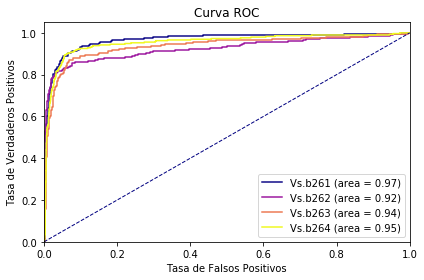

CPU times: user 11.7 s, sys: 1e+03 µs, total: 11.7 s
Wall time: 11.7 s


In [14]:
%%time
svc_poly = WithAnotherExperiment(
    clf=SVC(kernel='poly', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_poly("b278"))

b278 (TRAIN) Vs. b261 (TEST)
             precision    recall  f1-score   support

          0       0.98      0.99      0.99      2497
          1       0.89      0.80      0.84       221

avg / total       0.97      0.98      0.98      2718

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.97      0.99      0.98      2495
          1       0.93      0.75      0.83       296

avg / total       0.97      0.97      0.97      2791

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.96      0.99      0.98      2500
          1       0.94      0.69      0.79       305

avg / total       0.96      0.96      0.96      2805

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b264 (TE

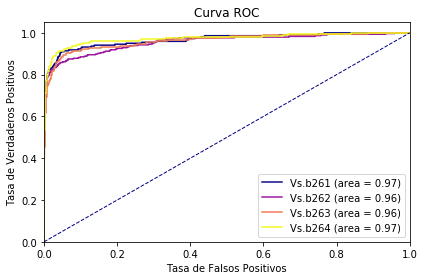

CPU times: user 13 s, sys: 11 ms, total: 13 s
Wall time: 13 s


In [15]:
%%time
svc_rbf = WithAnotherExperiment(
    clf=SVC(kernel='rbf', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_rbf("b278"))

b278 (TRAIN) Vs. b261 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      0.99      2497
          1       0.94      0.88      0.91       221

avg / total       0.99      0.99      0.99      2718

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      2495
          1       0.97      0.85      0.90       296

avg / total       0.98      0.98      0.98      2791

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      2500
          1       0.96      0.86      0.91       305

avg / total       0.98      0.98      0.98      2805

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b264 (TE

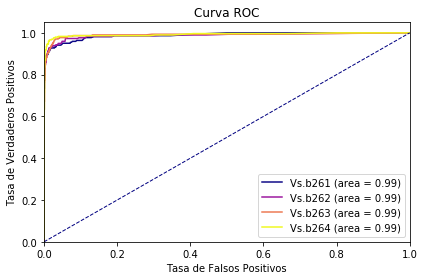

CPU times: user 1min 19s, sys: 4.39 s, total: 1min 24s
Wall time: 17 s


In [16]:
%%time 
rf = WithAnotherExperiment(
    clf=RandomForestClassifier(n_estimators=500, criterion="entropy", n_jobs=cpu), 
    clsnum=cls, data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(rf("b278"))

b278 (TRAIN) Vs. b261 (TEST)
             precision    recall  f1-score   support

          0       0.98      0.99      0.98      2497
          1       0.86      0.76      0.80       221

avg / total       0.97      0.97      0.97      2718

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.97      0.99      0.98      2495
          1       0.91      0.73      0.81       296

avg / total       0.96      0.96      0.96      2791

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.96      0.99      0.98      2500
          1       0.90      0.68      0.77       305

avg / total       0.95      0.96      0.95      2805

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b264 (TE

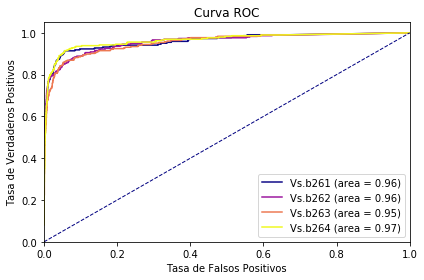

CPU times: user 17.6 s, sys: 0 ns, total: 17.6 s
Wall time: 17.6 s


In [17]:
%%time
knn = WithAnotherExperiment(
    clf=KNeighborsClassifier(n_neighbors=50, weights='distance'), 
    clsnum=cls, data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(knn("b278"))

## b261 vs. Los demas

b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.97      0.99      0.98      2495
          1       0.91      0.73      0.81       296

avg / total       0.96      0.96      0.96      2791

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.97      0.99      0.98      2500
          1       0.93      0.74      0.83       305

avg / total       0.97      0.97      0.96      2805

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b264 (TEST)
             precision    recall  f1-score   support

          0       0.97      0.99      0.98      2498
          1       0.95      0.77      0.85       294

avg / total       0.97      0.97      0.97      2792

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b278 (TE

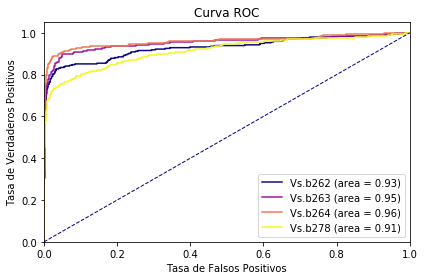

CPU times: user 7.17 s, sys: 0 ns, total: 7.17 s
Wall time: 7.17 s


In [18]:
%%time
svc_linear = WithAnotherExperiment(
    clf=SVC(kernel='linear', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_linear("b261"))

b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      2495
          1       0.91      0.60      0.73       296

avg / total       0.95      0.95      0.95      2791

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      2500
          1       0.89      0.55      0.68       305

avg / total       0.94      0.94      0.94      2805

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b264 (TEST)
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      2498
          1       0.91      0.59      0.71       294

avg / total       0.95      0.95      0.95      2792

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b278 (TE

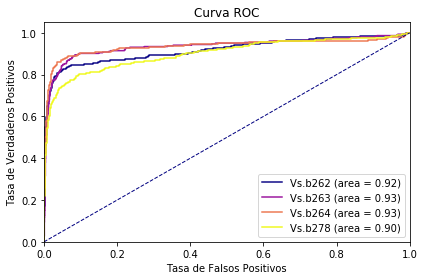

CPU times: user 5.97 s, sys: 6 ms, total: 5.98 s
Wall time: 5.97 s


In [19]:
%%time
svc_poly = WithAnotherExperiment(
    clf=SVC(kernel='poly', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_poly("b261"))

b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      2495
          1       0.95      0.70      0.80       296

avg / total       0.96      0.96      0.96      2791

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.96      0.99      0.98      2500
          1       0.94      0.66      0.77       305

avg / total       0.96      0.96      0.96      2805

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b264 (TEST)
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      2498
          1       0.95      0.70      0.80       294

avg / total       0.96      0.96      0.96      2792

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b278 (TE

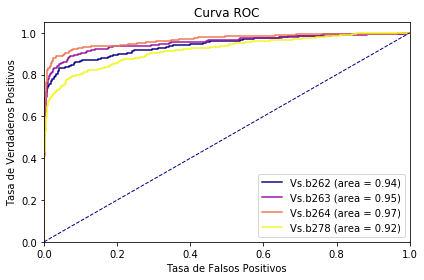

CPU times: user 6.68 s, sys: 6 ms, total: 6.68 s
Wall time: 6.67 s


In [20]:
%%time
svc_rbf = WithAnotherExperiment(
    clf=SVC(kernel='rbf', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_rbf("b261"))

b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.97      1.00      0.99      2495
          1       0.98      0.77      0.86       296

avg / total       0.97      0.97      0.97      2791

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      2500
          1       0.98      0.80      0.88       305

avg / total       0.98      0.98      0.98      2805

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b264 (TEST)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      2498
          1       0.98      0.85      0.91       294

avg / total       0.98      0.98      0.98      2792

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b278 (TE

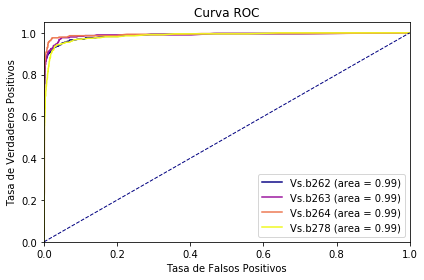

CPU times: user 1min 8s, sys: 3.99 s, total: 1min 12s
Wall time: 16.6 s


In [21]:
%%time 
rf = WithAnotherExperiment(
    clf=RandomForestClassifier(n_estimators=500, criterion="entropy", n_jobs=cpu), 
    clsnum=cls, data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(rf("b261"))

b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.96      0.99      0.98      2495
          1       0.93      0.66      0.77       296

avg / total       0.96      0.96      0.96      2791

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      2500
          1       0.92      0.58      0.71       305

avg / total       0.95      0.95      0.94      2805

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b264 (TEST)
             precision    recall  f1-score   support

          0       0.96      0.99      0.98      2498
          1       0.93      0.63      0.75       294

avg / total       0.95      0.96      0.95      2792

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b278 (TE

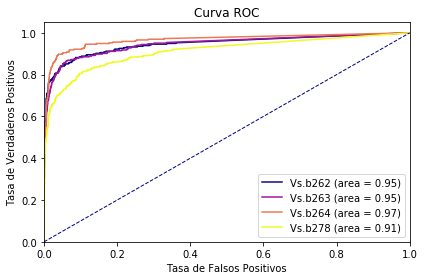

CPU times: user 16.8 s, sys: 3 ms, total: 16.8 s
Wall time: 16.8 s


In [22]:
%%time
knn = WithAnotherExperiment(
    clf=KNeighborsClassifier(n_neighbors=50, weights='distance'), 
    clsnum=cls, data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(knn("b261"))

## b278 + b261 vs. Los demas

b278 + b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.97      0.99      0.98      2495
          1       0.90      0.74      0.81       296

avg / total       0.96      0.96      0.96      2791

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.97      0.99      0.98      2500
          1       0.92      0.73      0.82       305

avg / total       0.96      0.96      0.96      2805

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b264 (TEST)
             precision    recall  f1-score   support

          0       0.97      0.99      0.98      2498
          1       0.94      0.77      0.84       294

avg / total       0.97      0.97      0.97      2792

--------------------------------------------------------------------------------


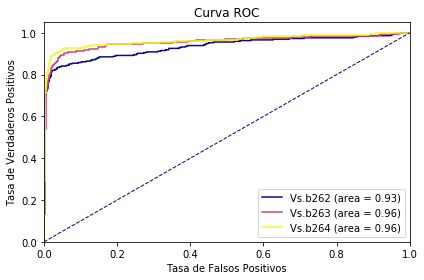

CPU times: user 37.6 s, sys: 39 ms, total: 37.6 s
Wall time: 37.6 s


In [23]:
%%time
svc_linear = WithAnotherExperiment(
    clf=SVC(kernel='linear', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_linear(["b278", "b261"]))

b278 + b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.96      0.99      0.98      2495
          1       0.90      0.68      0.77       296

avg / total       0.96      0.96      0.96      2791

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.96      0.99      0.97      2500
          1       0.86      0.62      0.72       305

avg / total       0.95      0.95      0.94      2805

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b264 (TEST)
             precision    recall  f1-score   support

          0       0.96      0.99      0.98      2498
          1       0.90      0.68      0.77       294

avg / total       0.96      0.96      0.96      2792

--------------------------------------------------------------------------------


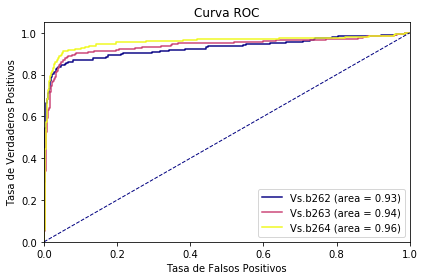

CPU times: user 22.7 s, sys: 51 ms, total: 22.7 s
Wall time: 22.7 s


In [24]:
%%time
svc_poly = WithAnotherExperiment(
    clf=SVC(kernel='poly', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_poly(["b278", "b261"]))

b278 + b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      2495
          1       0.95      0.73      0.82       296

avg / total       0.97      0.97      0.97      2791

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.96      1.00      0.98      2500
          1       0.95      0.68      0.79       305

avg / total       0.96      0.96      0.96      2805

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b264 (TEST)
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      2498
          1       0.96      0.74      0.84       294

avg / total       0.97      0.97      0.97      2792

--------------------------------------------------------------------------------


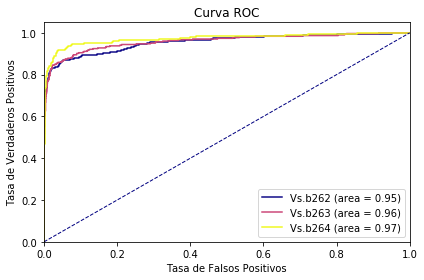

CPU times: user 23.3 s, sys: 39 ms, total: 23.4 s
Wall time: 23.4 s


In [25]:
%%time
svc_rbf = WithAnotherExperiment(
    clf=SVC(kernel='rbf', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_rbf(["b278", "b261"]))

b278 + b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      2495
          1       0.98      0.85      0.91       296

avg / total       0.98      0.98      0.98      2791

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      2500
          1       0.97      0.85      0.91       305

avg / total       0.98      0.98      0.98      2805

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b264 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      0.99      2498
          1       0.97      0.92      0.94       294

avg / total       0.99      0.99      0.99      2792

--------------------------------------------------------------------------------


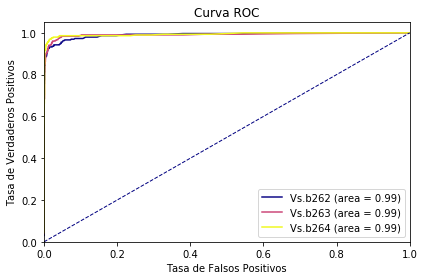

CPU times: user 1min 51s, sys: 3.25 s, total: 1min 55s
Wall time: 13.5 s


In [26]:
%%time 
rf = WithAnotherExperiment(
    clf=RandomForestClassifier(n_estimators=500, criterion="entropy", n_jobs=cpu), 
    clsnum=cls, data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(rf(["b278", "b261"]))

b278 + b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.97      0.99      0.98      2495
          1       0.92      0.72      0.81       296

avg / total       0.96      0.96      0.96      2791

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.96      0.99      0.98      2500
          1       0.89      0.67      0.77       305

avg / total       0.95      0.96      0.95      2805

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b264 (TEST)
             precision    recall  f1-score   support

          0       0.97      0.99      0.98      2498
          1       0.90      0.73      0.81       294

avg / total       0.96      0.96      0.96      2792

--------------------------------------------------------------------------------


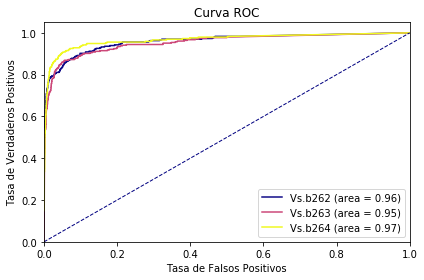

CPU times: user 25.9 s, sys: 3 ms, total: 25.9 s
Wall time: 25.9 s


In [27]:
%%time
knn = WithAnotherExperiment(
    clf=KNeighborsClassifier(n_neighbors=50, weights='distance'), 
    clsnum=cls, data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(knn(["b278", "b261"]))

## b278 + b261 + b264 vs. Los demas

b278 + b261 + b264 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.97      0.99      0.98      2495
          1       0.90      0.77      0.83       296

avg / total       0.97      0.97      0.97      2791

--------------------------------------------------------------------------------
b278 + b261 + b264 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.97      0.99      0.98      2500
          1       0.92      0.76      0.83       305

avg / total       0.97      0.97      0.97      2805

--------------------------------------------------------------------------------


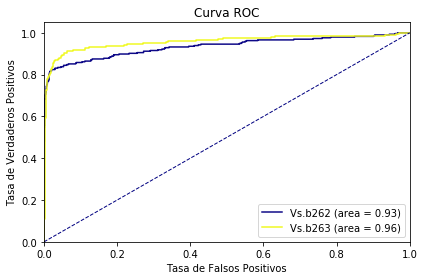

CPU times: user 44.1 s, sys: 242 ms, total: 44.3 s
Wall time: 44.3 s


In [28]:
%%time
svc_linear = WithAnotherExperiment(
    clf=SVC(kernel='linear', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_linear(["b278", "b261", "b264"]))

b278 + b261 + b264 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.96      0.99      0.98      2495
          1       0.90      0.69      0.78       296

avg / total       0.96      0.96      0.96      2791

--------------------------------------------------------------------------------
b278 + b261 + b264 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.96      0.99      0.97      2500
          1       0.86      0.67      0.75       305

avg / total       0.95      0.95      0.95      2805

--------------------------------------------------------------------------------


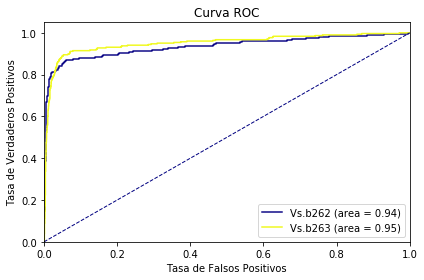

CPU times: user 27.9 s, sys: 296 ms, total: 28.2 s
Wall time: 28.2 s


In [29]:
%%time
svc_poly = WithAnotherExperiment(
    clf=SVC(kernel='poly', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_poly(["b278", "b261", "b264"]))

b278 + b261 + b264 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.97      0.99      0.98      2495
          1       0.94      0.75      0.84       296

avg / total       0.97      0.97      0.97      2791

--------------------------------------------------------------------------------
b278 + b261 + b264 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.97      0.99      0.98      2500
          1       0.94      0.73      0.82       305

avg / total       0.96      0.97      0.96      2805

--------------------------------------------------------------------------------


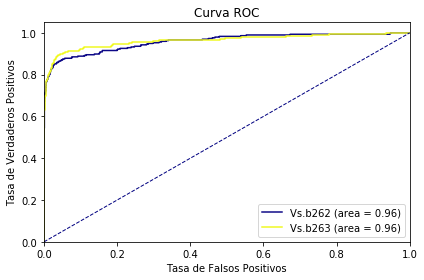

CPU times: user 28.3 s, sys: 241 ms, total: 28.5 s
Wall time: 28.5 s


In [30]:
%%time
svc_rbf = WithAnotherExperiment(
    clf=SVC(kernel='rbf', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_rbf(["b278", "b261", "b264"]))

b278 + b261 + b264 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      2495
          1       0.98      0.86      0.92       296

avg / total       0.98      0.98      0.98      2791

--------------------------------------------------------------------------------
b278 + b261 + b264 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      2500
          1       0.97      0.87      0.92       305

avg / total       0.98      0.98      0.98      2805

--------------------------------------------------------------------------------


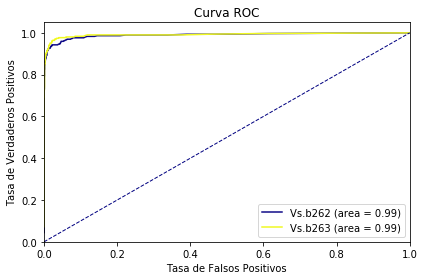

CPU times: user 1min 50s, sys: 1.99 s, total: 1min 52s
Wall time: 9.67 s


In [31]:
%%time 
rf = WithAnotherExperiment(
    clf=RandomForestClassifier(n_estimators=500, criterion="entropy", n_jobs=cpu), 
    clsnum=cls, data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(rf(["b278", "b261", "b264"]))

b278 + b261 + b264 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.97      0.99      0.98      2495
          1       0.91      0.75      0.82       296

avg / total       0.96      0.97      0.96      2791

--------------------------------------------------------------------------------
b278 + b261 + b264 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.97      0.99      0.98      2500
          1       0.88      0.71      0.79       305

avg / total       0.96      0.96      0.96      2805

--------------------------------------------------------------------------------


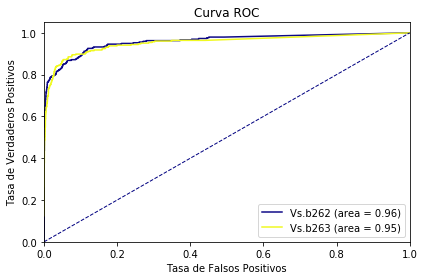

CPU times: user 27.5 s, sys: 8 ms, total: 27.5 s
Wall time: 27.5 s


In [32]:
%%time
knn = WithAnotherExperiment(
    clf=KNeighborsClassifier(n_neighbors=50, weights='distance'), 
    clsnum=cls, data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(knn(["b278", "b261", "b264"]))